# Assignment 2
* In this assignment you will be working with three data files from iMDB:
    * cast.csv
    * release_dates.csv
    * titles.csv
* Using the appropriate file(s), answer the following questions
* Some questions can be completed with one-liners while others are a bit more involved
* Where appropriate, answers should also provide brief commentary
* Exclude data that doen't make senss, i.e. data from the future
* Once complete upload this notebook to your classwork Github repo and post the link on Canvas 

In [63]:
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [113]:
cast = pd.read_csv('cast.csv')

In [114]:
release = pd.read_csv('release_dates.csv')

In [115]:
titles = pd.read_csv('titles.csv')

### 1. Conduct a high level assessment of the three data files, i.e. how many records are there, what kind of data, etc. Summarize your findings with annotation. 

In [116]:
cast.count()

title        3442896
year         3442902
name         3442902
type         3442902
character    3442894
n            2115119
dtype: int64

In [117]:
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


In [118]:
cast.shape

(3442902, 6)

In the dataset 'Cast', there are 3442902 rows and 6 columns. The column names are title, year, name, type, character and n. If n is 1, that means that person was the star of the movie. There also seems to be a lot of missing variables for n. 

In [119]:
titles.count()

title    226012
year     226013
dtype: int64

In [120]:
titles.head()

,title,year
0,Ankara ekspresi,1952
1,"Ans Vaterland, ans teure",1915
2,Miss Mohini,2002
3,La vera madre,1999
4,O Amerikanos,1993


In [121]:
titles.shape

(226013, 2)

In the dataset 'Titles', there are 226013 rows and 2 columns. The column names are title and year. Neither title or year suffers from nas. 

In [9]:
release.count()

title      443485
year       443486
country    443486
date       443486
dtype: int64

In [10]:
release.head()

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#BKKY,2016,Cambodia,2017-10-12
2,#Beings,2015,Romania,2015-01-29
3,#Captured,2017,USA,2017-09-05
4,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21


In [122]:
release.shape

(443486, 4)

In the dataset 'Release', there are 443486 rows and 4 columns. The column names are title, year, country and date. None of these columns suffer from an abudance of nas. 

In [128]:
cast = cast[cast.year < 2023]  #removing any anomolies that may not be actual data. 
titles = titles[titles.year < 2023]
release = release[release.year < 2023]

### 2. How many movies have the title North by Northwest

In [129]:
titles[titles['title'] == "North by Northwest"].value_counts()

title               year
North by Northwest  1959    1
Name: count, dtype: int64

### 3. How many version of Hamlet are there, when was the first made? the last?

In [130]:
titles[titles['title'].str.contains("Hamlet", na=False)].count()

title    55
year     55
dtype: int64

In [131]:
filter_titles = titles[titles['title'].str.contains("Hamlet", na=False)].sort_values(by = 'year')

In [132]:
filter_titles.iloc[0]['title'] #first

'Hamlet'

In [133]:
filter_titles.iloc[-1]['title'] #last

'Hamlet: The Fall of a Sparrow'

### 4. List all the movies called Treasure Island from oldest to newest

In [134]:
titles[titles['title'].str.contains("Treasure Island", na=False)].sort_values(by = 'year')

,title,year
180911,Treasure Island,1918
108853,Treasure Island,1920
87953,Treasure Island,1934
5854,The Secret of Treasure Island,1938
126321,Treasure Island,1950
8382,Return to Treasure Island,1954
26147,Five on a Treasure Island,1957
190233,Treasure Island,1972
122150,Treasure Island,1973
52099,Treasure Island,1985


### 5. How many movies were made in 1950? 1980? 2000? What conclusions can you draw from these data points?

In [135]:
titles[(titles['year']== 1950) | (titles['year'] == 1980) | (titles['year'] == 2000 )].groupby('year').size()

year
1950    1109
1980    1750
2000    2568
dtype: int64

In 2000, there were more than double the movies made compared to 1950. There has been an increase in movies made per year throughout this time period. This could be due to the availability of television. Movies are much easier to access now than they were in the 1950s. 

### 6. How big was the cast of Metropolis


In [136]:
cast[cast['title'] == "Metropolis"]['name'].count()

33

### 7. How many roles for actors were there 1950's? 1990's

In [137]:
cast['decade']= (cast['year']/10).astype(int) * 10

In [138]:
cast['decade'].value_counts()

decade
2010    1027836
2000     676027
1990     361218
1980     257683
1940     210670
1950     209890
1970     202992
1930     198570
1960     182616
1920      71938
1910      43129
2020        238
1900         70
1890          3
Name: count, dtype: int64

In [139]:
cast[(cast['decade']== 1950)].groupby('type').size()

type
actor      153559
actress     56331
dtype: int64

In [140]:
cast[(cast['decade']== 1990)].groupby('type').size()

type
actor      245713
actress    115505
dtype: int64

There were much less actress roles in the 1950s than there were in the 1990s. Actor roles have increased as well. 

### 8. How many roles for actors & actresses over time? Output should be a line graph

In [143]:
years = cast['year'].value_counts().sort_index()
years

year
1894        3
1900        2
1905        1
1906       17
1907        5
        ...  
2018    43518
2019     1406
2020      188
2021       34
2022       16
Name: count, Length: 120, dtype: int64

<Axes: xlabel='year'>

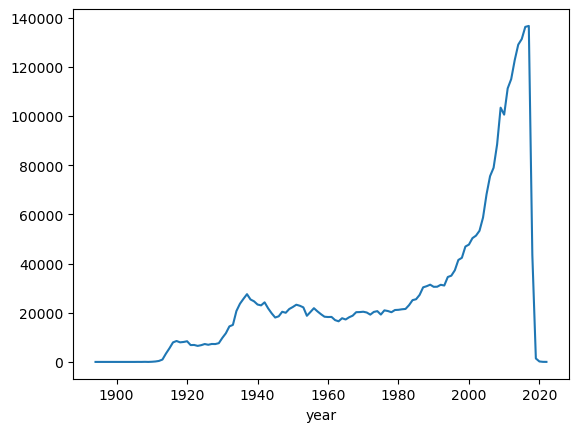

In [142]:
years.plot()

### 9. How many "leading roles" were there in the 2000's?

In [144]:
cast[cast['n'] == 1]
year = cast[cast['decade'] == 2000]
year[(year['n'] == 1) ].groupby('n').size()

n
1.0    23593
dtype: int64

### 10. How many roles received no ranking in the 2000's? 1950's. What conclusions can you draw from these two data points?

In [145]:
mask = cast['n'].isnull()

cast[(cast['decade'] == 2000) & mask].groupby('decade').size()

decade
2000    232037
dtype: int64

In [146]:
cast[(cast['decade'] == 1950) & mask].groupby('decade').size()

decade
1950    95406
dtype: int64

There were a lot more roles that recieved no ranking in the 2000s than there were in the 1950s. This could be due to a difference in the way movies were made. There may be more extras in recent years than there were in the 1950s. Extras may not recieve a ranking. 

### 11. Plot the number of films made in each decade

In [147]:
decade_counts = cast.groupby('decade').count()
dec = decade_counts['title']
dec

decade
1890          3
1900         70
1910      43129
1920      71938
1930     198570
1940     210670
1950     209890
1960     182616
1970     202992
1980     257683
1990     361218
2000     676027
2010    1027830
2020        238
Name: title, dtype: int64

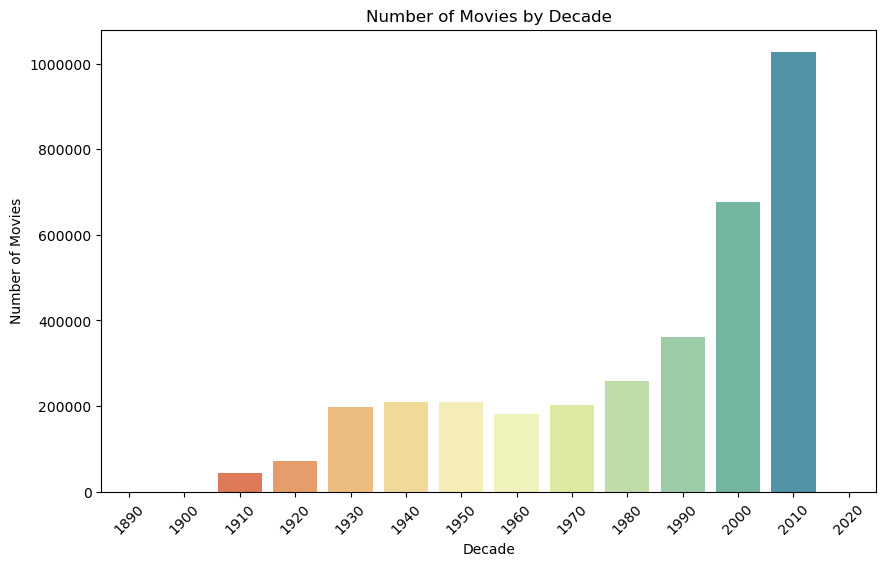

In [148]:
plt.figure(figsize=(10, 6))
plt.ticklabel_format(style='plain')
sns.barplot(x=dec.index, y=dec.values, palette="Spectral")
plt.xlabel("Decade")
plt.ylabel("Number of Movies")
plt.title("Number of Movies by Decade")
plt.xticks(rotation=45)
plt.show()

### 12. Plot the number of films with a Rustler character over time

In [149]:
rustler = cast[cast['character'].str.contains("Rustler", na=False)]
# Group data by year and count the number of films
yearly_counts = rustler.groupby('year').size()


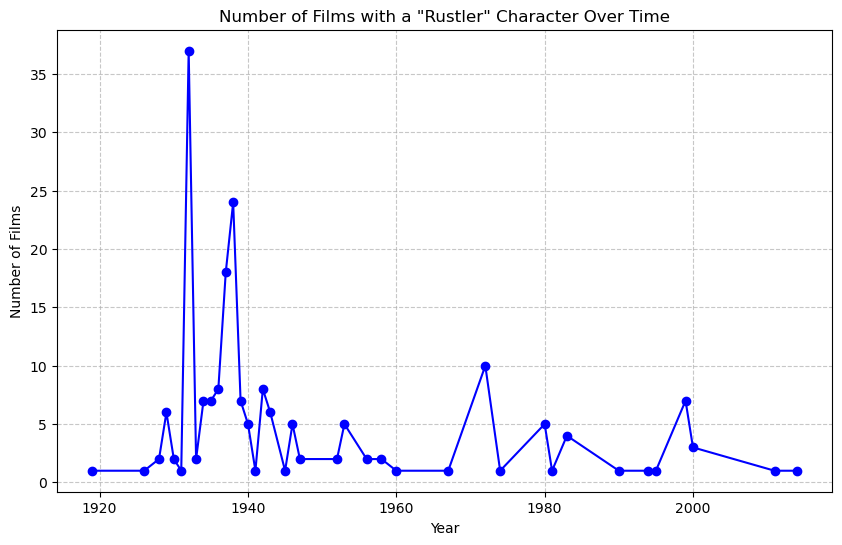

In [150]:
plt.figure(figsize=(10, 6))
plt.plot(yearly_counts.index, yearly_counts.values,'bo', linestyle='-')
plt.title('Number of Films with a "Rustler" Character Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Films')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

### 13. What are the top ten character names of all time?

In [151]:
cast['character'].value_counts().head(10)

character
Himself        19637
Dancer         12019
Extra          10848
Reporter        7818
Doctor          6963
Party Guest     6786
Student         6631
Policeman       6424
Bartender       6290
Herself         6269
Name: count, dtype: int64

### 14. Which actor appeared in the most films in the 1990's decade?

In [152]:
ninetys = cast[(cast['decade']== 1990)]
actor_counts = ninetys['name'].value_counts()

In [153]:
actor_counts.idxmax() 

'Shakti Kapoor'

In [154]:
actor_counts.max()

143

### 15. What are the top 10 roles that start with Science?

In [155]:
science_roles = cast[cast['character'].str.startswith('Science', na=False)]

In [156]:
role_counts = science_roles['character'].value_counts()
role_counts.head(10)

character
Science Teacher         57
Science Fair Student     9
Science Student          6
Science Fair Judge       6
Science Kid              5
Science Fair Kid         5
Science Reporter         5
Science                  4
Science Officer          3
Science teacher          3
Name: count, dtype: int64

### 16. What film has the largest cast

In [157]:
film_cast = cast.groupby('title')['name'].nunique()
film_cast.idxmax()

'Around the World in 80 Days'

In [158]:
film_cast.max()

1363

### 17. Generate descriptive statistics for cast size. Briefly comment on the results

In [161]:
film_cast.describe()

count    168250.000000
mean         20.116202
std          23.608116
min           1.000000
25%           6.000000
50%          13.000000
75%          26.000000
max        1363.000000
Name: name, dtype: float64

The mean cast size is about 24 members, while the maximum cast size is 1363 members. The minimum cast size is 1 person. Most of the cast size's are below 26 members, with the largest cast found above being an outlier. 

### 18. How many films has Natalie Portman been in in each year throughout her career?

In [160]:
cast[cast['name'] == "Natalie Portman"]['title'].count()

41

### 19. How many films did Natalie Portman appear in each year where where she was either the top star or co-star?

In [162]:
portman = cast[cast['name'] == "Natalie Portman"]
portman[(portman['n'] == 1) | (portman['n'] == 2) ].groupby('year').size()

year
1999    1
2000    1
2002    1
2005    3
2006    2
2007    1
2008    1
2009    1
2010    2
2011    2
2013    1
2015    2
2016    2
dtype: int64

### 20. Determine how many roles for actor or actress by decade. Plot the output 

In [163]:
actress = cast[cast['type'] == "actress"].groupby('decade').size()
actress

decade
1890         1
1900        16
1910     15733
1920     23826
1930     49298
1940     50871
1950     56331
1960     54484
1970     60977
1980     80619
1990    115505
2000    235217
2010    382288
2020       116
dtype: int64

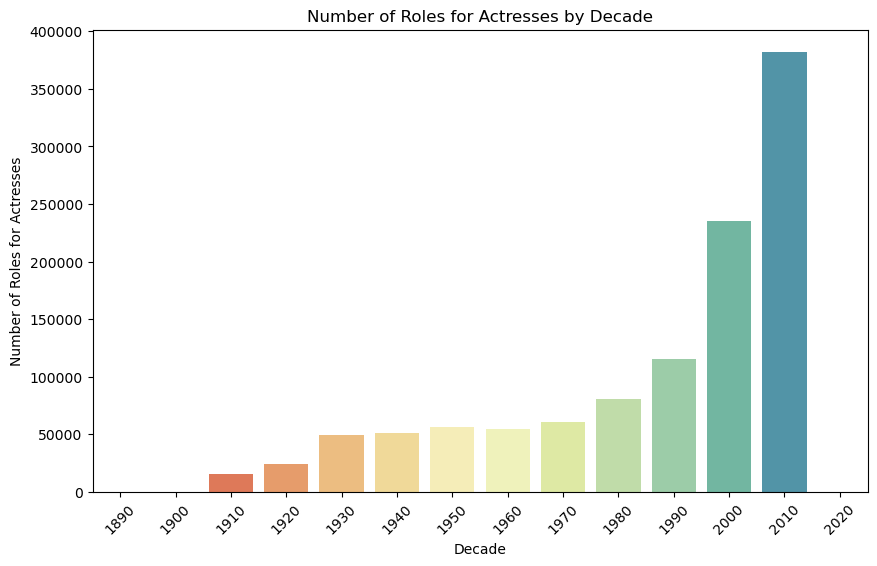

In [164]:
plt.figure(figsize=(10, 6))
plt.ticklabel_format(style='plain')
sns.barplot(x=actress.index, y=actress.values, palette="Spectral")
plt.xlabel("Decade")
plt.ylabel("Number of Roles for Actresses")
plt.title("Number of Roles for Actresses by Decade")
plt.xticks(rotation=45)
plt.show()

### 21. Determine and comment on the day of the week that movies are released. What is notable about release days and months throughout the year? (Use pd.pivot_table)

In [165]:
release.head()

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#BKKY,2016,Cambodia,2017-10-12
2,#Beings,2015,Romania,2015-01-29
3,#Captured,2017,USA,2017-09-05
4,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21


In [166]:
release['date']= pd.to_datetime(release['date'])

In [167]:
release['day']=release['date'].dt.day_name()
release['day'].value_counts()

day
Friday       163172
Thursday     125745
Wednesday     53439
Monday        37209
Saturday      31332
Tuesday       16762
Sunday        15823
Name: count, dtype: int64

In [168]:
release['month']=release['date'].dt.month_name()
release['month'].value_counts()

month
March        40257
October      40204
January      39412
December     39093
November     38200
September    37750
April        37674
February     36307
May          35449
August       35011
June         32704
July         31421
Name: count, dtype: int64

In [180]:
pivot_table = pd.pivot_table(release, index = 'month', columns = 'day', aggfunc ='size', fill_value=0)
pivot_table

day,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
month,,,,,,,
April,13559,3168,2868,1358,10625,1446,4650
August,13430,2844,2277,1138,9931,1121,4270
December,13018,3240,3357,1813,10665,1903,5097
February,13833,3138,2395,1277,10356,1190,4118
January,13734,3699,2925,1822,10746,1823,4663
July,11635,2267,2291,894,8947,1144,4243
June,11997,2337,2409,1031,9469,1179,4282
March,15268,3383,2742,1228,11844,1313,4479
May,13198,3050,2270,1165,10100,1377,4289


It seems like Fridays are the most popular days to release a movie. This makes sense as everybody is going into the weekend, they may have the time to see the movie. The most popular month to release a movie in is March, while the least popular is July. The fact that not as many movies are released in July makes sense to me because most people are enjoying the outdoors. 

### 22. Can you plot the pivot table? Is the output "correct"? Can you fix it?

<Axes: xlabel='month'>

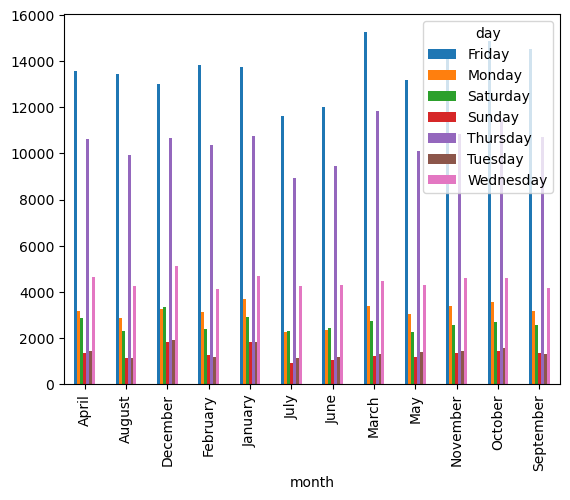

In [182]:
pivot_table.plot.bar()

I adapted the code above to get this by setting the index to month and columns to day. Before, I had both month and day in the index. Although it doesn't look pretty, I think this does look right. Based on the table above, you can see that Friday is the most popular day to release a movie. Based on the graph, we can see this as well. I think this could look even better if it was more spread out, or if it was a stacked bar chart. 

### 23. What films did actors in Star Wars go on to appear in? 

In [183]:
starwars = cast[cast['title'] == 'Star Wars']['name'].unique()

other_films = cast[cast['name'].isin(starwars)]

films_after_starwars = other_films[~other_films['title'].isin(['Star Wars'])]['title'].unique()


In [184]:
films_after_starwars

array(['Every Little Crook and Nanny', 'Linda Lovelace for President',
       'Rogue One', 'Smorgasbord', 'The Roommates', 'The Sting II',
       'The Student Body', 'The Zebra Force',
       "Adventures of a Plumber's Mate", 'Adventures of a Private Eye',
       'Adventures of a Taxi Driver', 'Alfie Darling', 'Big Zapper',
       'Eskimo Nell', 'Hennessy', 'Licensed to Love and Kill',
       'The Deadly Females', 'The Fast Kill',
       'The Night My Number Came Up', 'The Swordsman',
       'Track the Man Down', '24 Hour Party People', 'Amadeus',
       'Flash Gordon', 'Labyrinth', 'Mona Lisa', 'Sleeping Beauty',
       'Star Wars: Episode I - The Phantom Menace',
       'Star Wars: Episode II - Attack of the Clones',
       'Star Wars: Episode III - Revenge of the Sith',
       'Star Wars: Episode V - The Empire Strikes Back',
       'Star Wars: Episode VI - Return of the Jedi', 'The Elephant Man',
       'The King and I', 'Time Bandits', 'U.F.O.', 'Willow',
       'Wombling Free', '